In [4]:
from sklearn.linear_model import LinearRegression

from ml_tooling import Model
from ml_tooling.data.load_demo import load_demo_dataset

In [5]:
# Instantiate a model with an estimator
linear_boston = Model(LinearRegression())

# Instantiate the data
data = load_demo_dataset('boston')
# Split training and test data
data.create_train_test()

<DemoData - Dataset>

In [6]:
# Score the estimator yielding a Result object
result = linear_boston.score_estimator(data)
print(result)

[12:26:51] - Scoring estimator...


<Result LinearRegression: {'r2': 0.68}>


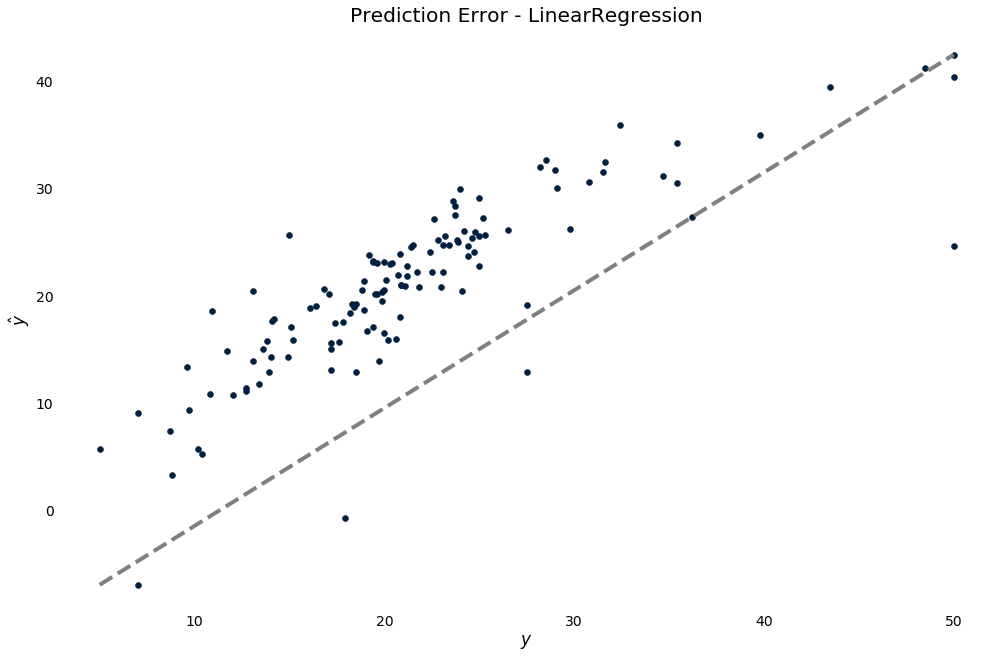

In [7]:
# Visualize the result
result.plot.prediction_error()

# Scaling

In [8]:
from sklearn.pipeline import Pipeline

from ml_tooling.transformers import DFStandardScaler

scaled = Pipeline([
    ('scale', DFStandardScaler()),
    ('model', LinearRegression())
])

In [9]:
scaled_linear = Model(scaled)
result = scaled_linear.score_estimator(data)
result

[12:26:55] - Scoring estimator...


<Result LinearRegression: {'r2': 0.68}>

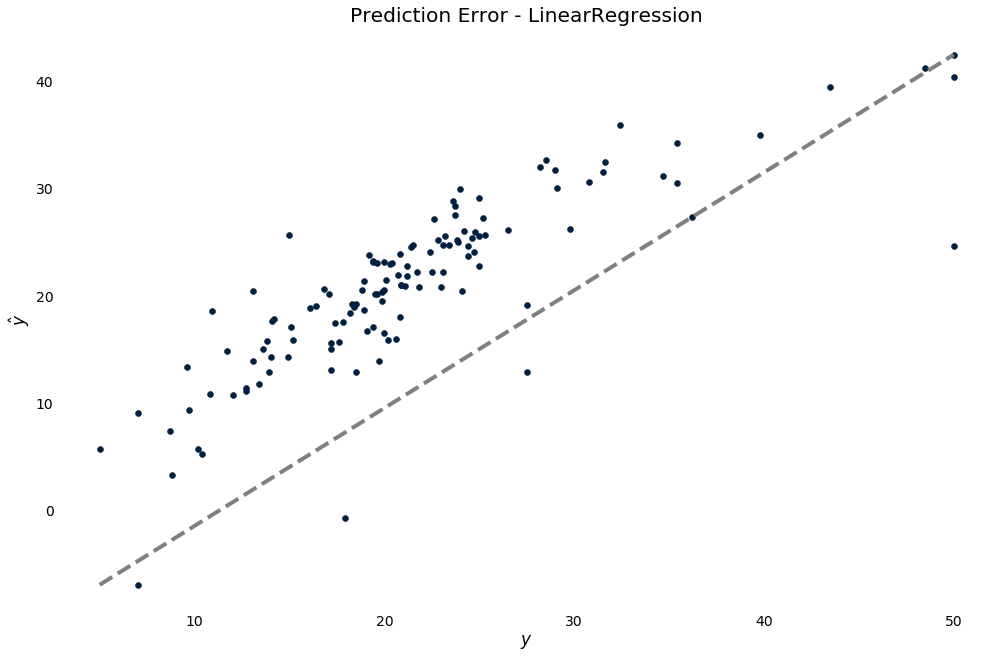

In [10]:
result.plot.prediction_error()

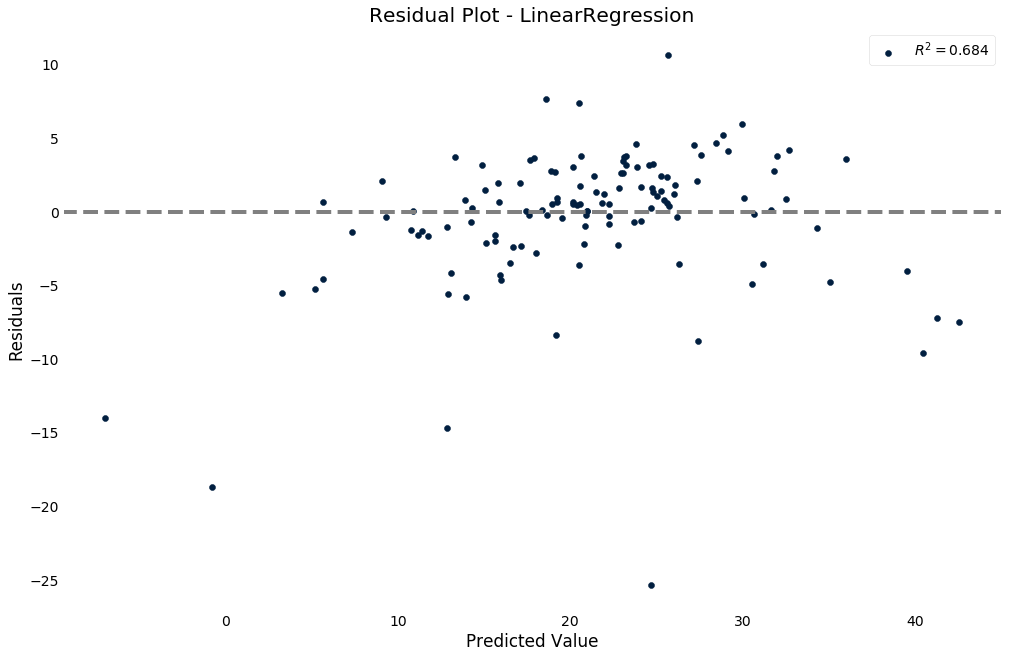

In [11]:
result.plot.residuals()

In [12]:
from sklearn.linear_model import RidgeCV, ElasticNetCV
from ml_tooling.transformers import Select

In [13]:
def create_pipeline(estimator):
    return Pipeline([
        ('select', Select(['LSTAT', 'RM', 'PTRATIO', 'INDUS','TAX', 'NOX',  'CRIM'])),
        ('scaler', DFStandardScaler()),
        ('estimator', estimator)
    ])

In [14]:
estimators = [create_pipeline(est)
              for est
              in [LinearRegression(),
                  RidgeCV(cv=100),
                  ElasticNetCV(cv=100)]
             ]
best_model, results = Model.test_estimators(data, estimators)

[12:26:58] - Training estimator 1/3: LinearRegression
[12:26:58] - Scoring estimator...
[12:26:58] - Training estimator 2/3: RidgeCV
[12:26:58] - Scoring estimator...
[12:26:59] - Training estimator 3/3: ElasticNetCV
[12:26:59] - Scoring estimator...
[12:27:01] - Best estimator: ElasticNetCV - r2: 0.6285630323902646


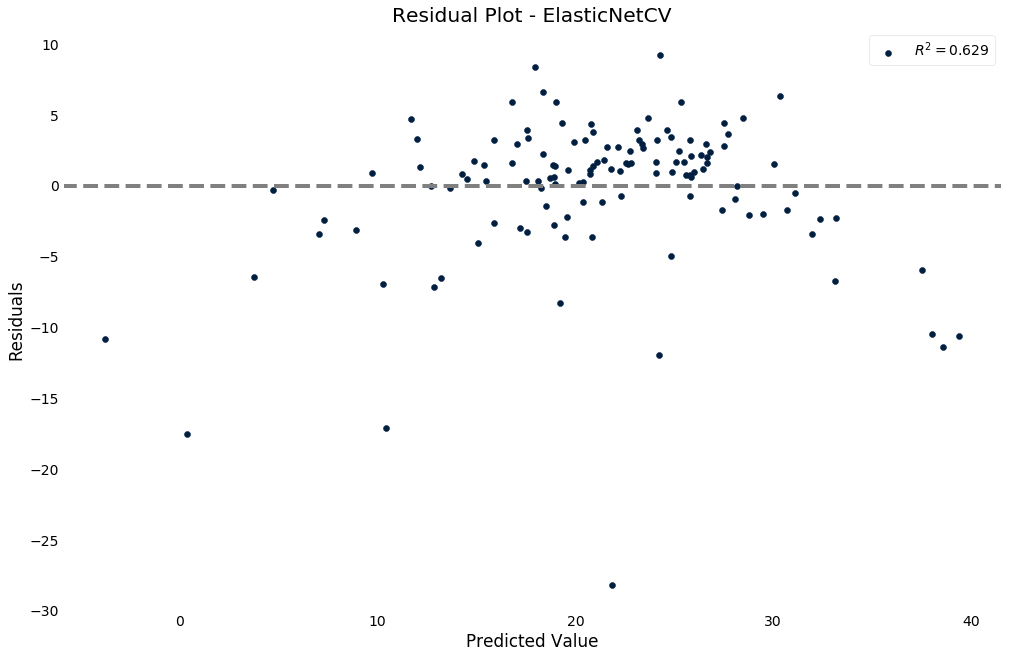

In [15]:
results.plot.residuals()

In [16]:
best_model.estimator.named_steps['estimator'].coef_

array([-3.7566104 ,  3.50097015, -1.77435125,  0.43724345, -0.29467565,
       -0.20043769, -0.64169858])

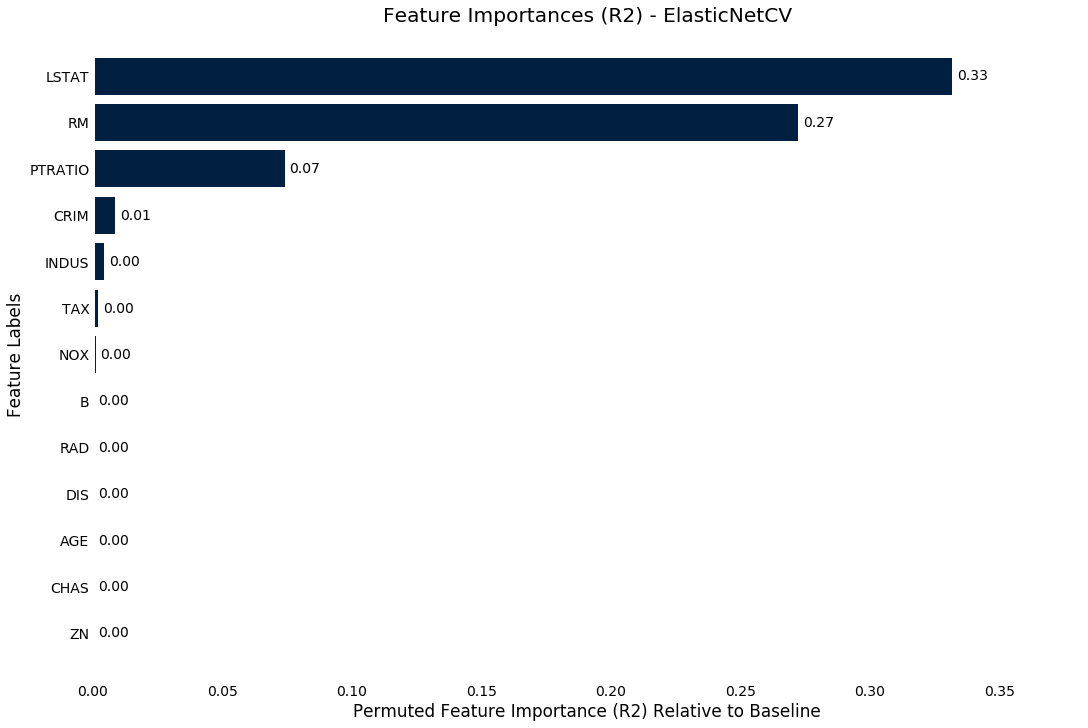

In [17]:
results.plot.feature_importance(1000)